In [57]:
from warnings import filterwarnings
filterwarnings("ignore")

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import accuracy_score,auc,roc_curve

In [59]:
data = pd.read_csv("loan_data.csv")

In [60]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [62]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
data[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [65]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [66]:
data.shape[0]

614

In [67]:
data.shape[1]

13

In [68]:
df = data.copy()

In [69]:
# Checking if there is a row with all values are nans
df.dropna(how='all').shape

(614, 13)

In [70]:
df.dropna(thresh=2).shape

(614, 13)

In [71]:
na = [f for f in df.columns if df[f].hasnans]
na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [72]:
cat_na = df[na].select_dtypes("object").columns.to_list()
con_na = df[na].select_dtypes("number").columns.to_list()

In [73]:
cat_na

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [74]:
con_na

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [75]:
for f in cat_na:
    df[f].fillna(df[f].mode()[0],inplace=True)

In [76]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
for f in con_na:
    df[f].fillna(df[f].mean(),inplace=True)

In [78]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

In [79]:
cat = df.select_dtypes("object").columns.to_list()
num = df.select_dtypes("number").columns.to_list()

In [80]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [81]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

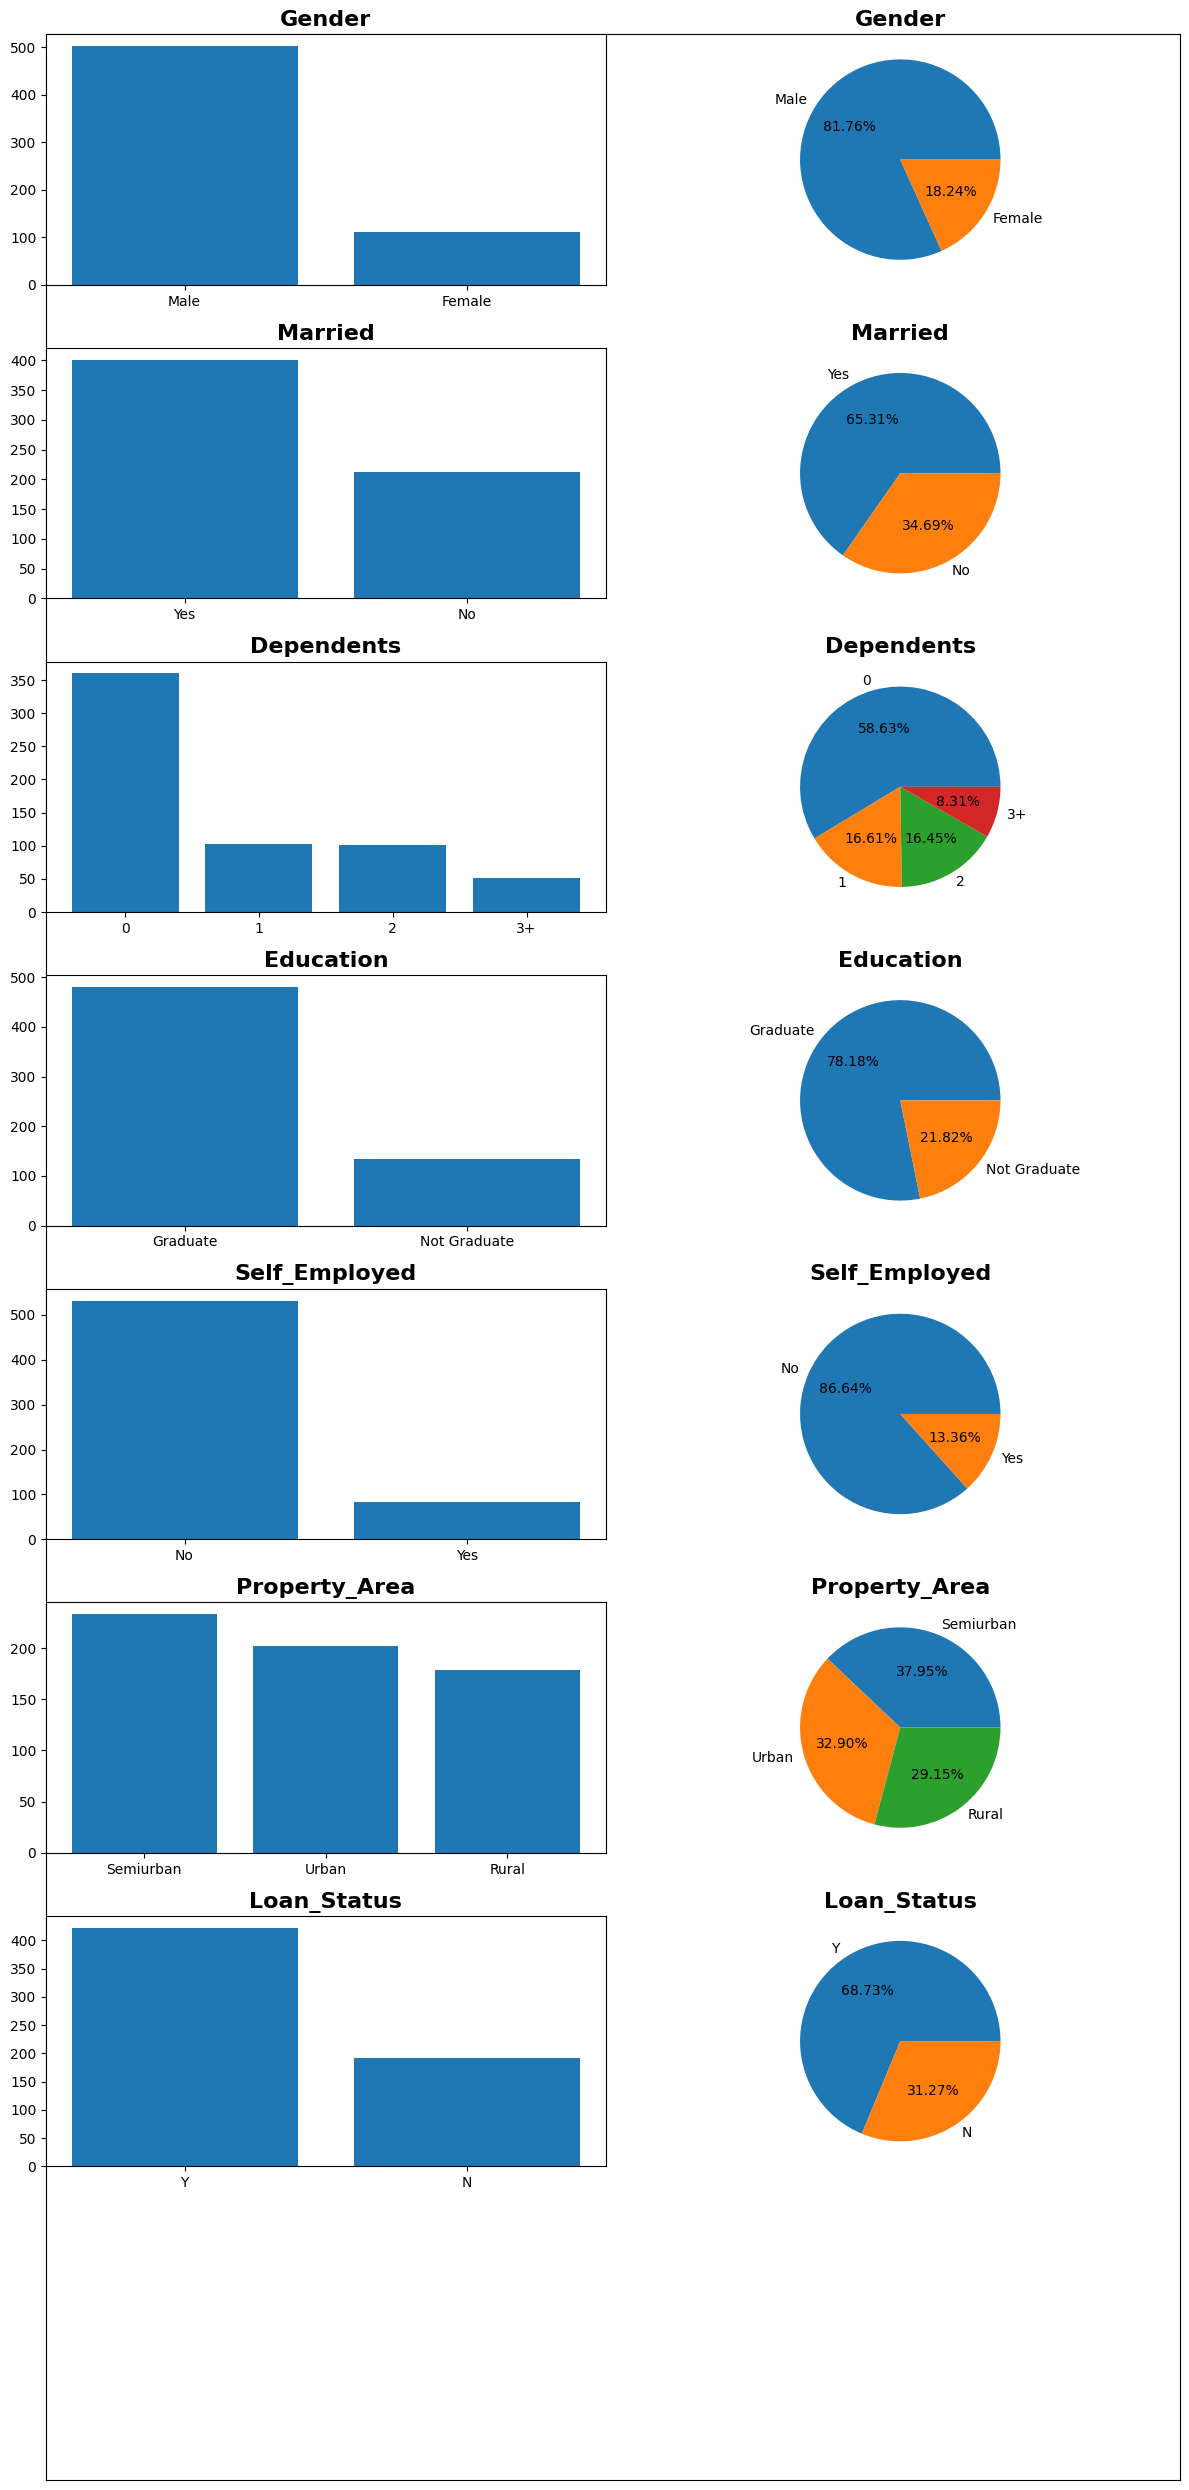

In [82]:
plt.figure(figsize=(12,25))
plt.yticks([])
plt.xticks([])
i = 1
for x in cat[1:]:
    plt.subplot(len(cat),2,i)
    plt.title(x,fontsize=16,weight='bold')
    plt.bar(x = df[x].value_counts().index,height = df[x].value_counts())
    i += 1
    plt.subplot(len(cat),2,i)
    plt.title(x,fontsize=16,weight='bold')
    plt.pie(df[x].value_counts(),labels=df[x].value_counts().index,autopct="%.2f%%")
    i += 1
plt.tight_layout()
plt.show()

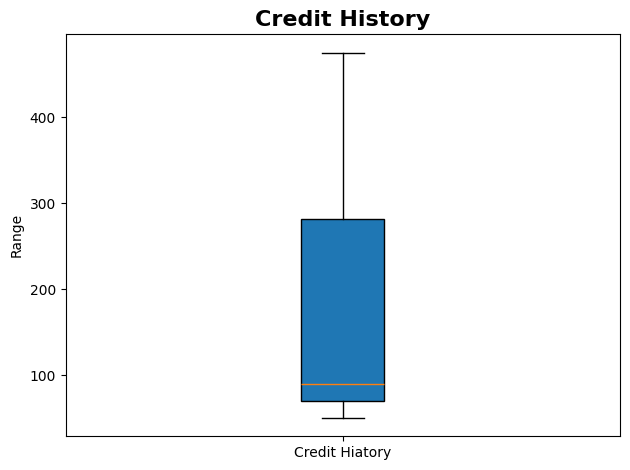

In [83]:
plt.title("Credit History",fontsize=16,weight='bold')
plt.boxplot(x = df["Credit_History"].value_counts(),patch_artist=True,sym='*')
plt.xticks([1],["Credit Hiatory"])
plt.ylabel("Range")
plt.tight_layout()
plt.show()

In [84]:
df.drop("Loan_ID",axis=1,inplace=True)

In [85]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [86]:
df['Dependents'].nunique()

4

In [87]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df["Dependents"] = oe.fit_transform(df[["Dependents"]])

In [88]:
from sklearn.compose import make_column_transformer
mk = make_column_transformer((OrdinalEncoder(),["Gender","Married","Self_Employed","Loan_Status","Property_Area","Education"]),remainder='passthrough')

In [89]:
df = pd.DataFrame(mk.fit_transform(df),columns=mk.get_feature_names_out())

In [90]:
x = df.loc[:,[x for x in df.columns if x != "ordinalencoder__Loan_Status"]]
y = df["ordinalencoder__Loan_Status"]

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
lg = LogisticRegression()

In [113]:
x = x.astype(float)
x.dtypes

ordinalencoder__Gender           float64
ordinalencoder__Married          float64
ordinalencoder__Self_Employed    float64
ordinalencoder__Property_Area    float64
ordinalencoder__Education        float64
remainder__Dependents            float64
remainder__ApplicantIncome       float64
remainder__CoapplicantIncome     float64
remainder__LoanAmount            float64
remainder__Loan_Amount_Term      float64
remainder__Credit_History        float64
dtype: object

In [114]:
lg.fit(x_train,y_train)

LogisticRegression()

In [115]:
pred = lg.predict(x_test)

In [116]:
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

<Axes: >

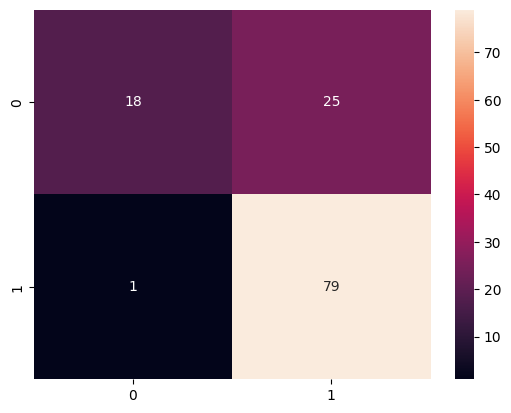

In [118]:
sns.heatmap(cm,annot=True)

In [119]:
rf = RandomForestClassifier()

In [120]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
pred = rf.predict(x_test)

<Axes: >

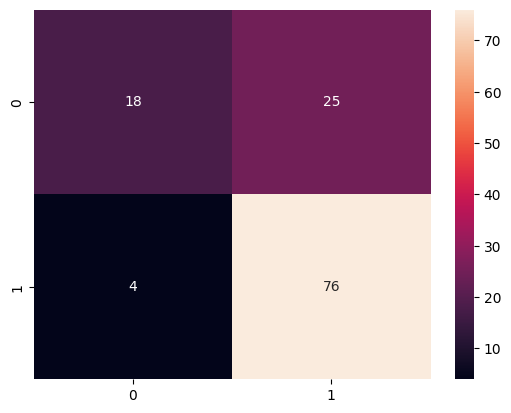

In [122]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [123]:
xgb = XGBClassifier()

In [124]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [126]:
pred = xgb.predict(x_test)

<Axes: >

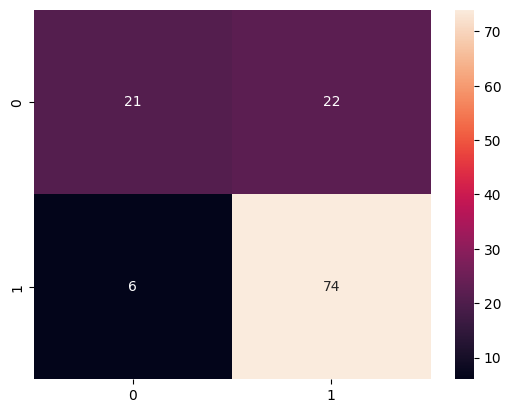

In [127]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)